# Mind over Music Data Analysis

Original data path: `../Ableton_Integration/code/data/`

In [111]:
"""IMPORT BOX"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

In [112]:
"""CONSTANTS"""
BASE_PATH = '../Ableton_Integration/code/data/'
FILE_PATH = 'trial-Fri May 29 20:29:00 2020.csv'

In [113]:
"""File Import"""
df = pd.read_csv(BASE_PATH+FILE_PATH)

cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].strip())
    
df.columns = cols

df['score'] = df['alpha'] - 0.5*(df['low beta'] + df['high beta']) - df['theta']

df.columns
df.loc[df['loss'] == df['loss'][0], ['loss']] = 0

df['loss'] = df['loss'].astype(float)

df

,time,reward,loss,alpha,low beta,high beta,gamma,theta,mod1,mod2,mod3,mod4,mod5,score
0,1.590799e+09,0.0000,0.000000,68.569,19.262,4.302,2.596,2.474,51,51,51,51,,5.431300e+01
1,1.590799e+09,141.2955,0.000000,291.191,102.213,72.918,28.072,8.017,50,50,50,50,,1.956085e+02
2,1.590799e+09,-189.2475,0.000000,20.831,18.107,5.839,2.750,2.497,49,49,49,49,,6.361000e+00
3,1.590799e+09,28.7625,0.000000,55.817,32.115,6.142,3.441,1.565,48,48,48,48,,3.512350e+01
4,1.590799e+09,-33.0075,0.000000,15.723,20.308,4.314,2.846,1.296,49,49,49,49,,2.116000e+00
5,1.590799e+09,-9.8885,0.000000,11.167,32.147,3.374,2.715,1.179,50,50,50,50,,-7.772500e+00
6,1.590799e+09,2.8355,0.000000,10.570,23.664,3.192,2.049,2.079,51,51,51,51,,-4.937000e+00
7,1.590799e+09,3.3855,0.000000,16.683,28.758,4.811,2.975,1.450,50,50,50,50,,-1.551500e+00
8,1.590799e+09,14.1820,0.000000,33.270,29.626,8.615,3.223,1.519,49,49,49,49,,1.263050e+01
9,1.590799e+09,-5.8895,0.000000,19.706,17.640,5.254,1.857,1.518,48,48,48,48,,6.741000e+00


time


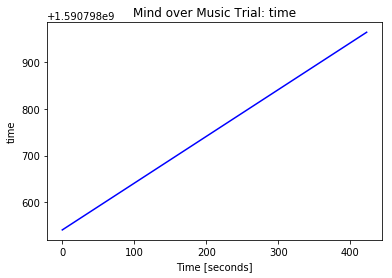

reward


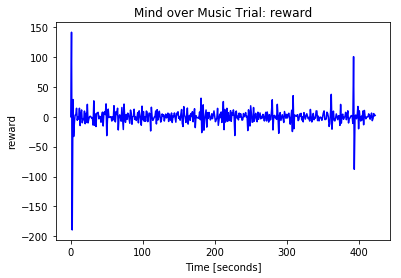

loss


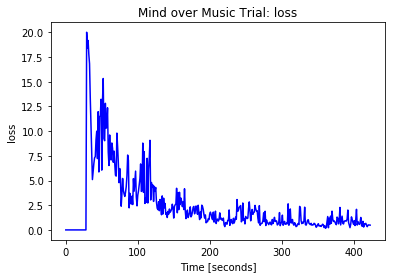

alpha


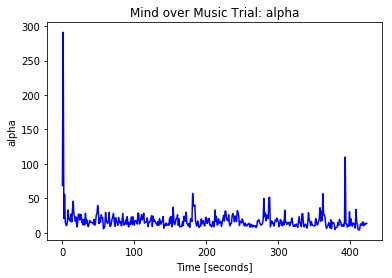

low beta


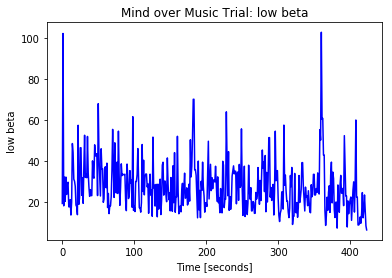

high beta


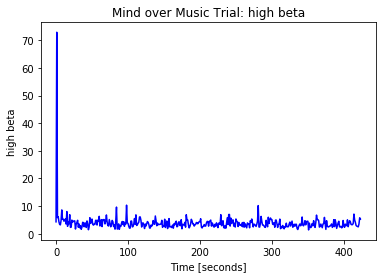

gamma


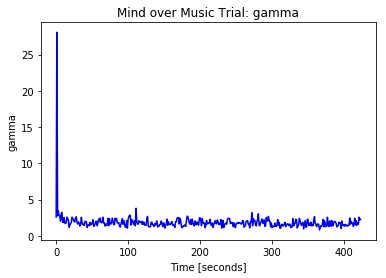

theta


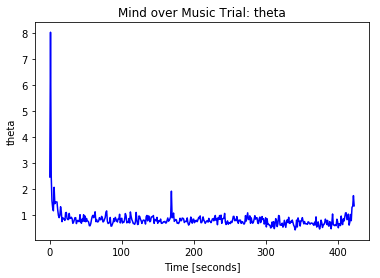

mod1


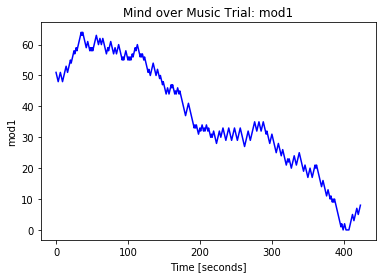

mod2


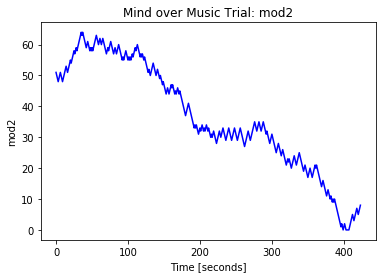

mod3


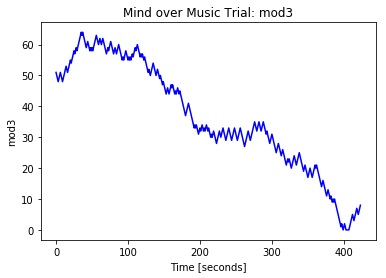

mod4


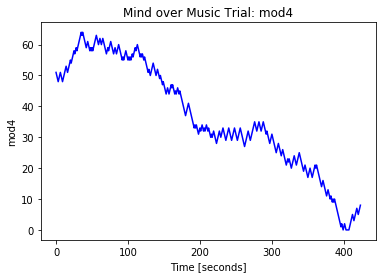

mod5


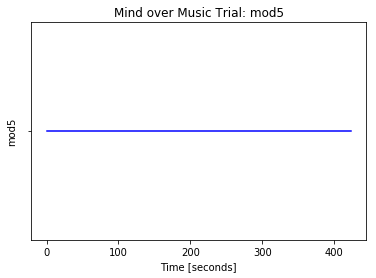

score


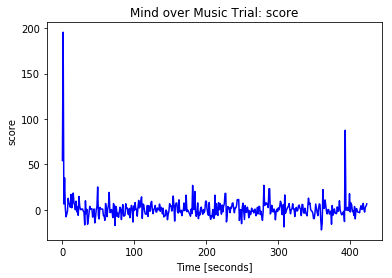

In [114]:
"""Plotting"""
title = 'reward'

for title in df.columns:
    print(title)
    plt.title('Mind over Music Trial: '+title)
    plt.plot(df[title], 'b')

    plt.xlabel('Time [seconds]')
    plt.ylabel(title)
    plt.show()
    

In [115]:
df['reward'][100:].sum()

2.252499999999994

time


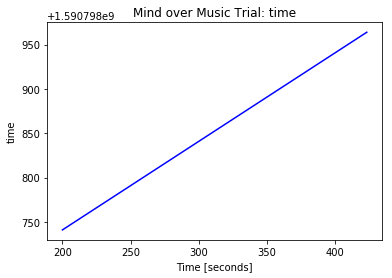

reward


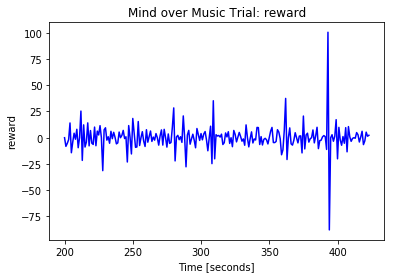

loss


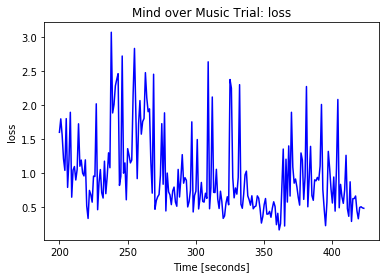

alpha


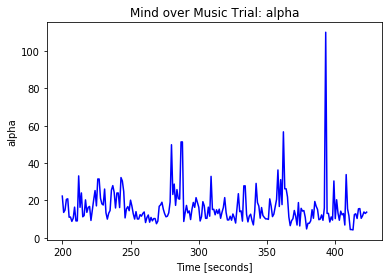

low beta


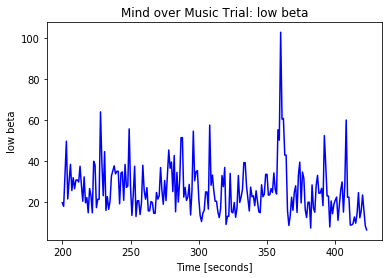

high beta


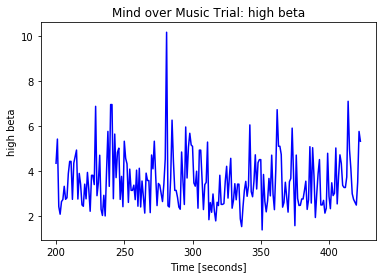

gamma


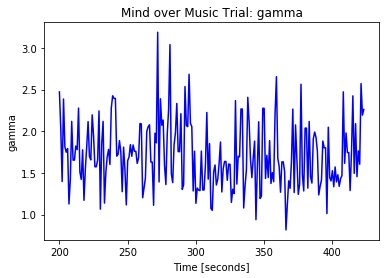

theta


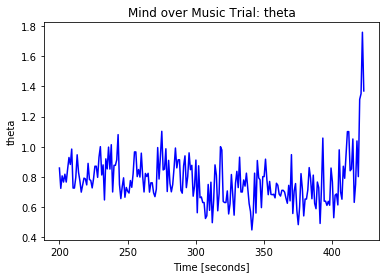

mod1


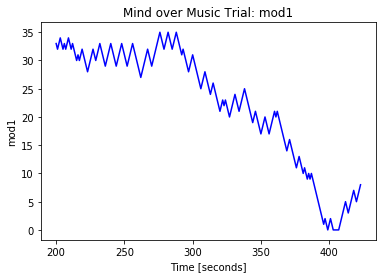

mod2


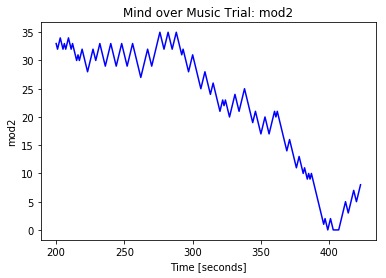

mod3


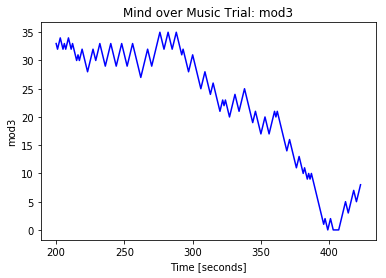

mod4


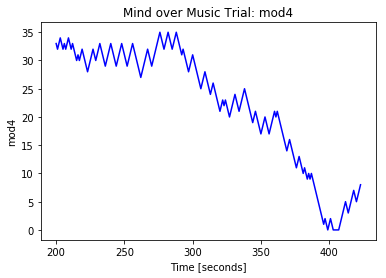

mod5


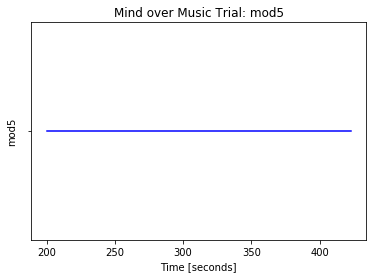

score


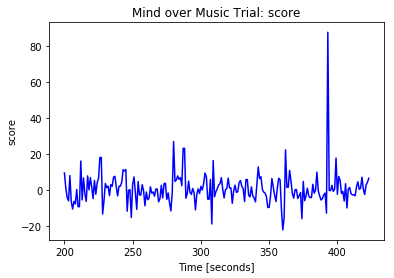

In [109]:
for title in df.columns:
    print(title)
    plt.title('Mind over Music Trial: '+title)
    plt.plot(df[title][200:], 'b')

    plt.xlabel('Time [seconds]')
    plt.ylabel(title)
    plt.show()

In [110]:
for i in df['loss']:
    if(type(i) == str):
        print(i)